# Kernel Trick Intuitive Example

In this part of the discussion, we show you an example to demonstrate how we can classify points by increasing the dimentionality of the dataset.

**STEP 1: Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

**STEP 2: Create an appropriate dataset and split it into training and testing data**

Shape of X = (100, 2)
Shape of y = (100,)


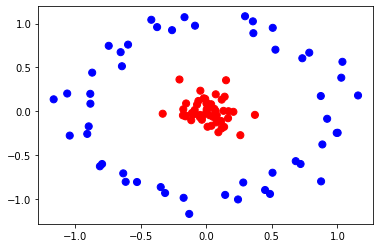

In [ ]:
X, y = make_circles(100, factor=.1, noise=.1, random_state =42)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
print("Shape of X =",X.shape)
print("Shape of y =",y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print("Shape of X_train  =",X_train.shape)
print("Shape of y_train  =",y_train.shape)
print("Shape of X_test =",X_test.shape)
print("Shape of y_test =",y_test.shape)

Shape of X_train  = (80, 2)
Shape of y_train  = (80,)
Shape of X_test = (20, 2)
Shape of y_test = (20,)


**STEP 3: Try using a Linear Classifier**

First we try classifying the data using a linear classifier. It is pretty clear to see that it will not fit the data very well.

In [ ]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy of Linear SVM = ",acc)

Accuracy of Linear SVM =  0.45


**STEP 4: Write Function to Plot the Decision Boundary**

In [ ]:
zero_one_colourmapbg = ListedColormap(('#3232ff', '#ff3232'))
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmapbg)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

Decision Boundary of Linear Classifier:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


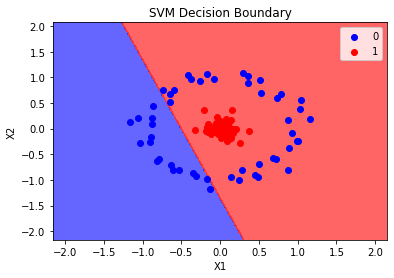

In [ ]:
plot_decision_boundary(X, y, classifier)

**STEP 5: Understand the new dimensions in data and how they will help**

Here, we will plot a 3D graph with X1 and X2 being x and y axis and use the  radial basis function for the z axis. The closer the datapoints are to the origin, the closer their z coordinate is to 1, and vice-versa.

Now we can plot a linear decision boundary through this dataset, i.e. by increasing the dimensionality of the dataset, we can now classify it with high accuracy.

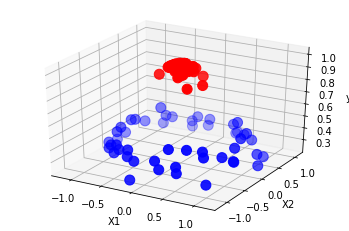

In [ ]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

plot_3d_plot(X,y)

**STEP 6: Try using a RBF Classifier**

First we try classifying the data using the RBF kernel of SVC function. Using the RBF Kernel allows us to get 100% accuracy.

In [ ]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy of RBF Kernel = ",acc)

Accuracy of RBF Kernel =  1.0


Decision Boundary of RBF Classifier:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


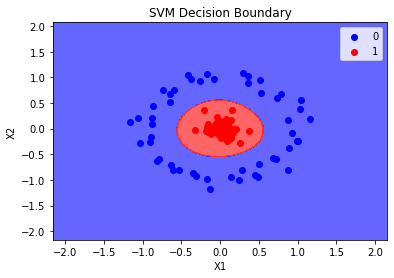

In [ ]:
plot_decision_boundary(X, y, rbf_classifier)

**STEP 6: Try using a Polynomial Classifier**

Next, we also try classifying the data using two different polynomial kernels of degrees 2 and 3 of SVC function.

Intuitively, our decision boundary should be in the form of circles, and hence polynomial kernel of degree 2 should fit much better than kernel of degree 3.

In [ ]:
poly_classifierd2 = SVC(kernel="poly",degree=2)
poly_classifierd2.fit(X_train, y_train)
y_predd2 = poly_classifierd2.predict(X_test)

poly_classifierd3 = SVC(kernel="poly",degree=3)
poly_classifierd3.fit(X_train, y_train)
y_predd3 = poly_classifierd3.predict(X_test)

acc2 = accuracy_score(y_test, y_predd2)
acc3 = accuracy_score(y_test, y_predd3)
print("Accuracy of Polynomial Kernel of degree 2= ",acc2)
print("Accuracy of Polynomial Kernel of degree 3= ",acc3)

Accuracy of Polynomial Kernel of degree 2=  1.0
Accuracy of Polynomial Kernel of degree 3=  0.4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


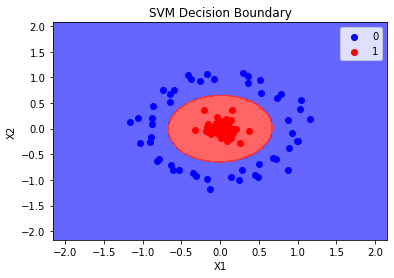

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


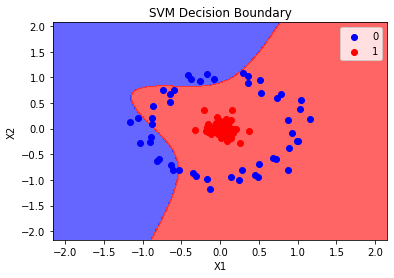

In [ ]:
plot_decision_boundary(X, y, poly_classifierd2)
plot_decision_boundary(X, y, poly_classifierd3)